# PW 5 : Statistics

## 1 - Introduction

We will use the `numpy` and `matplotlib` libraries to simulate and analyze experimental data using statistical functions, and plot them.

Import the `numpy` and `matplotlib.pyplot` libraries with appropriate aliases.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

---
## 2 - Experimental mean, standard deviation, confidence interval

### 2.1 Experimental mean

The **mean** of a list of values `x = (x[1],...,x[n])` is the number :

$$
M(x) = \frac 1n \sum_{i=1}^n x_i
$$

If `x` is represented in python by an array, the mean `Mx=M(x)` is obtained directly using the `mean` function of the `numpy` library:

```Python
Mx = np.mean(x)
```

When the list of numbers `x = (x[1],...,x[n])` follows a probability distribution `X`, we expect the mean value to approach a theoretical value called **the expectation** of `X`, denoted `E(X)`

For example, when numbers `x = (x[1],...,x[n])` are drawn at random according to a uniform probability law `X` in a given interval `[a,b]`, we expect the mean value `M(x)` to be close to the expectation `E(X) = (a+b)/2`.

 ### Exercise 1, question 1:

Generate an array `x` of 20 numbers drawn uniformly at random in the interval `[0,100]` (cf. PW4 §4.1) and then compute and display the average `Mx = M(x)`.

In [2]:
x = np.random.uniform (0, 100, 20)
Mx = np.mean(x)
print(Mx)

51.15651645796048


### Comment:

We note that the experimental mean of a random draw is not equal to the expectation. 

Expectation and mean are often confused: in fact, expectation is a value intrinsically linked to the phenomenon studied, and the experimental mean is a value computed from experimental data (which are sometimes few and contain errors). When a phenomenon is not well known, the computation of the experimental mean allows to have an approximate value of the expectation. The mean is therefore what we call an **estimator** of the expectation.

### Continued from exercise 1, question 2:

Run the following code and comment on the result. (**Answer in a new cell.)**
- Explain in particular what are the numbers in the table named `Mxs`.
- Also explain what the figure produced represents.

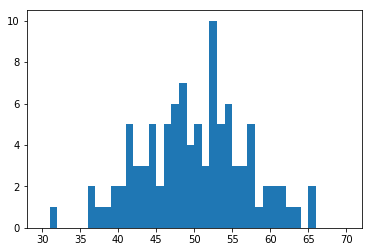

In [3]:
N = 20
Mxs = []
for i in range(100):
    x = np.random.uniform (0, 100 , N)
    Mx = np.mean(x)
    Mxs.append( Mx )
plt.figure()
plt.hist(Mxs,bins=40,range=[30,70])
plt.show()

This code runs a loop for which, at each turn: twenty numbers between 0 and 100 are drawn randomly, the mean of these twenty numbers is calculated and stored in a variable, and this variable is added to an array called Mxs. The code runs the loop one hundred times. Thus, the array Mxs is composed of one hundred elements and all these elements are a mean of different lists of twenty numbers between 0 and 100 drawn at random.
Then, the figure produced is a histogram representing the distribution of the elements of Mxs, in other words the hundred averages calculated. We can see that some of them are around the expected average but most are quite different from the expectation. It does not seem to be very representative.

### Continued from exercise 1, question 3:

1. Reproduce and execute the above code taking `N=100` and `N=1000` and `N=10000`.
1. Comment on the result. **(Answer in a new cell)**
1. Under what condition(s) does the experimental mean seem a good estimator of the expectation?

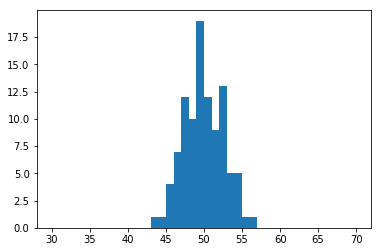

In [4]:
N = 100
Mxs = []
for i in range(100):
    x = np.random.uniform (0, 100 , N)
    Mx = np.mean(x)
    Mxs.append( Mx )
plt.figure()
plt.hist(Mxs,bins=40,range=[30,70])
plt.show()

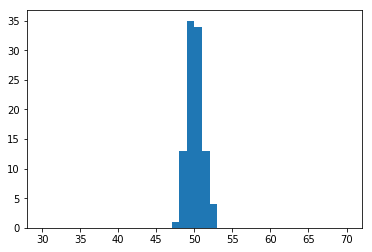

In [5]:
N = 1000
Mxs = []
for i in range(100):
    x = np.random.uniform (0, 100 , N)
    Mx = np.mean(x)
    Mxs.append( Mx )
plt.figure()
plt.hist(Mxs,bins=40,range=[30,70])
plt.show()

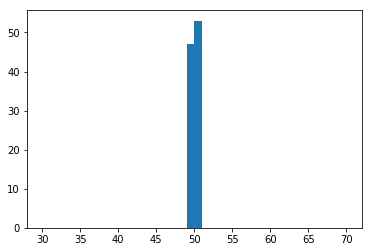

In [6]:
N = 10000
Mxs = []
for i in range(100):
    x = np.random.uniform (0, 100 , N)
    Mx = np.mean(x)
    Mxs.append( Mx )
plt.figure()
plt.hist(Mxs,bins=40,range=[30,70])
plt.show()

- 2) We can see that the higher the value of N is, the more accurate the histogram obtained is. Indeed, the number of times we draw a number between one and one hundred is determined by N. 
- 3) So, the experimental mean seems to be a good estimator of the expectation when we repete as often as possible the draw (at least ten thousand times).

### 2.2 Experimental standard deviation and confidence interval

We now take a closer look at the difference between the experimental mean and the expectation.

Here again, we only have the data from the experiment. From these data we compute what we call the **experimental standard deviation**, which is the **average** distance between the data and the experimental mean. The standard deviation is given by the formula :

$$
\sigma(X) = \sqrt{ \frac 1n \sum_{i=1}^n \bigl( x_i - M(X) \bigr)^2 }
$$

Probability theory tells us that

$$
\mathbb P\left( \bigl|\, M(X) - E(X) \,\bigr|\, \leq \frac {1.96\, \sigma(X)}{\sqrt n} \right) \geq 0.95
$$

We then establish a **confidence interval** centered on the expectation `M(X)`:

$$
\left[ \ M(X) - \frac {1.96\, \sigma(X)}{\sqrt n} \ ; \ M(X) + \frac {1.96\, \sigma(X)}{\sqrt n} \ \right]
$$

and we know **with a probability of 95%** that the expectation is in this interval.

### Notes:

- The values 0.95 and 1.96 given above are independent of the data in the experiment and are the result of probability theory.
- The confidence interval can be reduced by replacing 1.96 by 1.645 in the formula, but then the probability that it contains the expectation is only 90%.
- Like the expectation, there is a value of the standard deviation intrinsically linked to the phenomenon studied, and the experimental standard deviation is an estimator of this one.

### Continued from exercise 1, question 4:

1. Compute and display using python the experimental means, standard deviations, and confidence intervals for the following four random draws.

```Python
    x1 = np.random.uniform (0, 100 , 20)
    x2 = np.random.uniform (0, 100 , 100)
    x3 = np.random.uniform (0, 100 , 1000)
    x4 = np.random.uniform (0, 100 , 10000)
```

2. What do you notice about the value of the standard deviation? (**Answer in a new cell.**)
3. Is the confidence interval consistent with what we expect from the results of questions 2 and 3?
4. Is it possible that the expectation does not belong to the confidence interval?

### Notes:

- To compute the standard deviation `sigma_x` of an array of numbers `x`, use the `std` function from the `numpy` library:
```Python
    sigma_x = np.std(x)
```
- To compute the square root of a number `N`, use the `sqrt` function from the `numpy` library.
```Python
    np.sqrt(N)
```

In [7]:
N1 = 20
N2 = 100
N3 = 1000
N4 = 1000

x1 = np.random.uniform (0, 100 , 20)
x2 = np.random.uniform (0, 100 , 100)
x3 = np.random.uniform (0, 100 , 1000)
x4 = np.random.uniform (0, 100 , 10000)

Mx1 = np.mean(x1)
Mx2 = np.mean(x2)
Mx3 = np.mean(x3)
Mx4 = np.mean(x4)

print("Experimental means :")
print(Mx1)
print(Mx2)
print(Mx3)
print(Mx4)
print("\n")

sigma_x1 = np.std(x1)
sigma_x2 = np.std(x2)
sigma_x3 = np.std(x3)
sigma_x4 = np.std(x4)

print("Standard deviation :")
print(sigma_x1)
print(sigma_x2)
print(sigma_x3)
print(sigma_x4)
print("\n")

Ex1 = (1.96 * sigma_x1) / np.sqrt(N1)
Ex2 = (1.96 * sigma_x2) / np.sqrt(N2)
Ex3 = (1.96 * sigma_x3) / np.sqrt(N3)
Ex4 = (1.96 * sigma_x4) / np.sqrt(N4)

c_i1 = [Mx1 - Ex1, Mx1 + Ex1]
c_i2 = [Mx2 - Ex2, Mx2 + Ex2]
c_i3 = [Mx3 - Ex3, Mx3 + Ex3]
c_i4 = [Mx4 - Ex4, Mx4 + Ex4]

print("Confidence intervals :")
print(c_i1)
print(c_i2)
print(c_i3)
print(c_i4)

Experimental means :
48.16164614185428
53.49894813672304
49.81366540084886
49.76338194106444


Standard deviation :
25.19027087296387
28.94921039583495
29.409629188470003
28.961167715416977


Confidence intervals :
[37.12152316531257, 59.20176911839599]
[47.82490289913939, 59.172993374306685]
[47.990837698668784, 51.63649310302894]
[47.96835016895892, 51.558413713169955]


- 2) We can notice the value of the standard deviation is always between fifty-five and thirthy.
- 3) The confidence interval is consistent with what we expect from the results of questions 2 and 3. Indeed, the more we draw, the smaller the interval is and the higher its precision is.
- 4) Yes, it is possible that the expectation does not belong to the confidence interval. In fact, we choose a 95% confidence level so we know with a probability of 95% that the expectation is in this interval (the probability the expectation does not belong to the confidence interval is 5%). 

---

## 3 - Central Limit Theorem

This theorem states that a sum of independent random variables can be approximated by a Gaussian random variable (also called 'normal').

We will verify this on a simple example where `X1`, `X2` and `X3` follow uniform probability laws and `Y = X1 + X2 + X3`.

### Exercise 2, question 1:

1. Set `N = 1000`.
2. Generate three arrays `x1` `x2` and `x3` of `N` numbers each, drawn uniformly at random in the interval `[-1,1]`
3. Compute the three arrays of numbers `y1 = x1`, `y2 = x1 + x2` and `y3 = x1 + x2 + x3`.
4. Plot on the same figure the histograms of the tables `y1`, `y2` and `y3`.
    - Plot the histograms with the options `bins=40, range=[-4,4], density=True, histtype='step'`.
    - Add a legend to identify the three histograms (see PW4, §3.5).
    

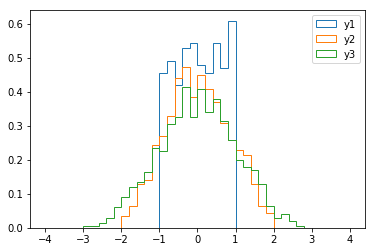

In [8]:
N = 1000

x1 = np.random.uniform (-1, 1, N)
x2 = np.random.uniform (-1, 1, N)
x3 = np.random.uniform (-1, 1, N)

y1 = x1
y2 = x1 + x2 
y3 = x1 + x2 + x3

plt.figure()
plt.hist(y1, bins=40, range=[-4,4], density=True, histtype='step', label='y1')
plt.hist(y2, bins=40, range=[-4,4], density=True, histtype='step', label='y2')
plt.hist(y3, bins=40, range=[-4,4], density=True, histtype='step', label='y3')
plt.legend()

### Continued from exercise 2, question 2:

1. Compute the means and standard deviations of the arrays of numbers `x1`, `x2`, `x3` and `y3` and check the relations:

$$
M(y_3) = M(x_1) + M(x_2) + M(x_3)
\quad
\mathrm{and}
\quad
\sigma (y_3)^2 \simeq \sigma (x_1)^2 + \sigma (x_2)^2 + \sigma (x_3)^2
$$

2. The theory says that the standard deviation of a sum of random variables checks the exact equality below. Can you explain why this is not the case here? (**answer in a new cell**)

$$
\sigma (Y_3)^2 = \sigma (X_1)^2 + \sigma (X_2)^2 + \sigma (X_3)^2
$$

In [9]:
Mx1 = np.mean(x1)
Mx2 = np.mean(x2)
Mx3 = np.mean(x3)
My3 = np.mean(y3)

sigma_x1 = np.std(x1)
sigma_x2 = np.std(x2)
sigma_x3 = np.std(x3)
sigma_y3 = np.std(y3)

print("Mx1 + Mx2 + Mx3 = ") 
print(Mx1 + Mx2 + Mx3)
print("My3 = ") 
print(My3)
print("So, 𝑀(𝑦3) = 𝑀(𝑥1) + 𝑀(𝑥2) + 𝑀(𝑥3)")
print("\n")
print("𝜎²(𝑥1) + 𝜎²(𝑥2)+ 𝜎²(𝑥3) = ") 
print(sigma_x1 ** 2 + sigma_x2 ** 2 + sigma_x3 ** 2)
print("𝜎²(𝑦3) = ")
print(sigma_y3 ** 2)
print("So, 𝜎²(𝑦3) ≃ 𝜎²(𝑥1) + 𝜎²(𝑥2)+ 𝜎²(𝑥3)")

Mx1 + Mx2 + Mx3 = 
0.003641439338884976
My3 = 
0.0036414393388849806
So, 𝑀(𝑦3) = 𝑀(𝑥1) + 𝑀(𝑥2) + 𝑀(𝑥3)


𝜎²(𝑥1) + 𝜎²(𝑥2)+ 𝜎²(𝑥3) = 
1.0053148786141883
𝜎²(𝑦3) = 
1.021730658418608
So, 𝜎²(𝑦3) ≃ 𝜎²(𝑥1) + 𝜎²(𝑥2)+ 𝜎²(𝑥3)


- 2) In our case, the equality is not checked because of the accuracy of the variables. In fact the more exact the variables are, the closer to equality we get.

### Continued from exercise 2, question 3:

1. Generate an array `y4` of `N` numbers, drawn randomly according to the Gaussian distribution with mean and standard deviation those of `y3` computed above.
2. Plot on the same figure the histograms of the tables of numbers `y3` and `y4`.

    - Plot the histograms with the options `bins=40, range=[-4,4], density=True, histtype='step'`.
    - Add a legend to identify the two histograms.


3. Does the Gaussian distribution `Y4` seem to you to be a good approximation of the sum of the three uniform distributions `Y3 = X1 + X2 + X3` ? (**Answer in a new cell.**)

### Note:

To generate a list `x` of `N` numbers drawn randomly according to the Gaussian distribution with mean `M` and standard deviation `Sigma` use the `random.normal` function from the `numpy` library:
```Python
x = np.random.normal(M, Sigma ,N)
```

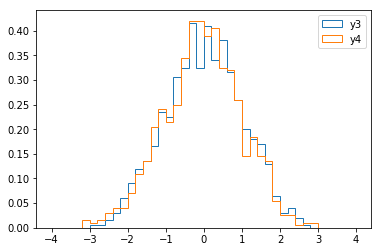

In [10]:
y4 = np.random.normal(My3, sigma_y3, N)
plt.figure()
plt.hist(y3, bins=40, range=[-4,4], density=True, histtype='step', label='y3')
plt.hist(y4, bins=40, range=[-4,4], density=True, histtype='step', label='y4')
plt.legend()

- 3) According to me, the Gaussian distribution Y4 seems to be a good approximation of the sum of the three uniform distributions Y3 = X1 + X2 + X3 because it is quite representative and accurate. 

---

## 4 - Analysis of real data

In the previous exercise, a large amount of data was voluntarily taken to test the correspondence of the sum of three uniform distributions and a Gaussian distribution, but the experimental data are often less numerous.

We will therefore treat an example with *'real'* data.

The following tables contain readings of maximum and minimum temperatures (°C) during the day, taken over a period of one hundred years, at a given weather station, on a fixed day of the year.

In [11]:
N=100
year = range(N)
temp_min = [
    16.2, 14.3, 15.3, 14.9, 15.7, 16.6, 14.4, 15.5, 15.3, 18.5,
    11.6, 8.40, 12.8, 14.3, 16.3, 14.0, 11.4, 14.4, 15.0, 12.4,
    14.2, 12.6, 16.6, 17.3, 14.9, 16.0, 13.3, 16.4, 15.0, 16.5,
    16.9, 15.8, 17.1, 17.3, 10.6, 14.6, 14.1, 13.8, 13.1, 16.1,
    12.1, 16.0, 13.6, 19.8, 16.0, 14.0, 14.2, 16.5, 12.5, 17.3,
    13.2, 15.1, 18.4, 14.3, 13.7, 13.0, 11.5, 12.6, 13.5, 13.7,
    10.7, 16.0, 17.2, 17.6, 15.8, 15.7, 15.2, 13.9, 19.2, 19.3,
    21.5, 16.4, 15.7, 13.9, 18.5, 16.3, 15.9, 14.4, 12.3, 14.5,
    13.4, 16.2, 13.2, 17.3, 17.0, 15.3, 20.3, 12.6, 12.4, 19.6,
    15.3, 15.5, 13.4, 23.3, 17.8, 19.4, 18.0, 16.5, 18.3, 17.4,
]
temp_max = [
    26.3, 29.3, 27.3, 26.6, 24.5, 26.5, 22.8, 23.5, 28.7, 31.2,
    20.8, 23.2, 19.4, 24.2, 28.4, 20.7, 21.7, 21.5, 26.0, 22.4,
    22.5, 25.7, 25.2, 25.3, 22.9, 25.8, 21.2, 33.4, 22.4, 29.8,
    27.7, 26.2, 28.7, 22.8, 22.5, 17.3, 19.6, 20.7, 21.3, 30.6,
    19.5, 20.6, 21.9, 30.6, 23.0, 20.0, 16.3, 27.3, 23.3, 28.6,
    22.8, 26.9, 26.2, 20.3, 26.8, 24.0, 19.2, 21.2, 21.6, 20.1,
    22.2, 21.8, 21.0, 30.2, 27.7, 26.5, 24.8, 20.1, 26.9, 31.5,
    32.6, 27.9, 24.3, 22.7, 30.4, 22.8, 32.3, 27.2, 27.0, 20.7,
    25.2, 29.4, 24.0, 27.7, 31.4, 23.7, 32.1, 23.1, 25.7, 30.0,
    25.8, 22.1, 24.7, 35.0, 23.7, 27.7, 28.0, 21.9, 27.9, 27.2,
]

### Exercise 3, question 1:

1. Plot the graphs of these readings with the year on the x-axis and the temperatures on the y-axis.
2. Minimum temperature: in blue.
3. Maximum temperature: in red.
4. Add a legend to identify the two graphs.
5. Add a name to each axis that indicates the nature of the data.

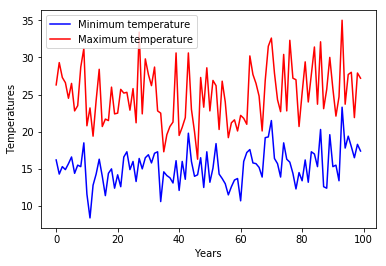

In [12]:
plt.figure()
plt.xlabel("Years")
plt.ylabel("Temperatures")
plt.plot(year, temp_min, label = 'Minimum temperature', color = 'blue')
plt.plot(year, temp_max, label = 'Maximum temperature', color = 'red')
plt.legend()

### Continued from exercise 3, question 2:

1. Compute the mean `mean_min` and standard deviation `sigma_min` of the minimum temperature table.
2. Generate a `simulation_min` table using a random draw of `N=100` numbers, following the Gaussian distribution with mean and standard deviation those of minimum temperature table computed above.
3. Plot on the same figure, the two following histograms with the options `bins=20,range=[0,40]`:

    - the histogram of the actual readings with the options `histtype='bar', color='blue'` 
    - the histogram of the random draw with the options `histtype='step', linewidth=3, color='orange'`
    - Add a legend to identify the two graphs.
    - Add a name to each axis that indicates the nature of the data.


4. Do you think that the Gaussian approximation is a good estimate of the distribution of observed temperatures? (**Answer in a new cell.**)

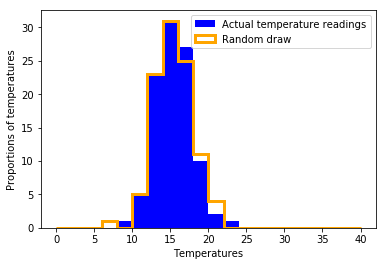

In [13]:
mean_min = np.mean(temp_min)
sigma_min = np.std(temp_min)
simulation_min = np.random.normal(mean_min, sigma_min, N)
plt.figure()
plt.hist(temp_min, bins=20, range=[0,40], histtype='bar', color='blue', label='Actual temperature readings')
plt.hist(simulation_min, bins=20, range=[0,40], histtype='step', linewidth=3, color='orange', label='Random draw')
plt.xlabel("Temperatures")
plt.ylabel("Proportions of temperatures")
plt.legend()

- 4) To my mind, the Gaussian distribution seems to be a good approximation of the distribution of observed temperatures because it is pretty representative and accurate. 

### Continued from exercise 3, question 3:

1. Do the same with the maximum temperature table, using red for the actual reading and green for the simulation. 
2. Do you think the Gaussian approximation is a good estimate of the distribution of observed temperatures? (**Answer in a new cell.**)

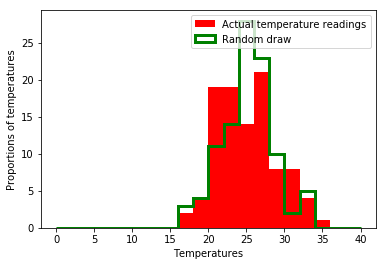

In [18]:
mean_max = np.mean(temp_max)
sigma_max = np.std(temp_max)
simulation_max = np.random.normal(mean_max, sigma_max, N)
plt.figure()
plt.hist(temp_max, bins=20, range=[0,40], histtype='bar', color='red', label='Actual temperature readings')
plt.hist(simulation_max, bins=20, range=[0,40], histtype='step', linewidth=3, color='green', label='Random draw')
plt.xlabel("Temperatures")
plt.ylabel("Proportions of temperatures")
plt.legend()

- 2) In my oppinion, the Gaussian distribution does not seem to be as good as the previous one because it is not as representative as the previous one because of several experimental mistakes. It is probably due to the dispersion of the values which is bigger than the previous one.

### Continued from exercise 3, question 4:

Combine the two previous figures into a single figure, making sure that the graphs of the two simulations remain clearly visible and are not covered by the graphs of the readings.

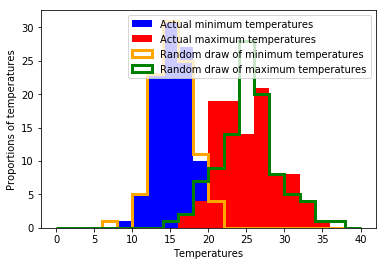

In [15]:
plt.figure()
plt.hist(temp_min, bins=20, range=[0,40], histtype='bar', color='blue', label='Actual minimum temperatures')
plt.hist(temp_max, bins=20, range=[0,40], histtype='bar', color='red', label='Actual maximum temperatures')
plt.hist(simulation_min, bins=20, range=[0,40], histtype='step', linewidth=3, color='orange', label='Random draw of minimum temperatures')
plt.hist(simulation_max, bins=20, range=[0,40], histtype='step', linewidth=3, color='green', label='Random draw of maximum temperatures')
plt.xlabel("Temperatures")
plt.ylabel("Proportions of temperatures")
plt.legend()